In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import classification_report

/home/sushil/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X=joblib.load("tfidf-5000").toarray()
y=joblib.load("y_amazon_5000")

In [4]:
from sklearn.model_selection import cross_val_score 

In [5]:
from sklearn.model_selection import cross_val_predict

In [6]:
from sklearn import datasets,metrics
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.decomposition import TruncatedSVD

In [8]:
from scipy.sparse import random as sparse_random

In [9]:
from sklearn.random_projection import sparse_random_matrix

In [10]:
svd=TruncatedSVD(n_components=100,n_iter=7,random_state=42)

In [11]:
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=7,
             random_state=42, tol=0.0)

In [12]:
x=svd.transform(X)

In [14]:
x.shape

(4994, 100)

In [15]:
X.shape

(4994, 3314)

In [27]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=False)

In [28]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(3995, 100)
(999, 100)
(3995,)
(999,)


In [29]:
x_train,x_cv,y_train,y_cv=train_test_split(X_train,Y_train,test_size=0.20,shuffle=False)

In [30]:
print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(3196, 100)
(799, 100)
(3196,)
(799,)


In [18]:
import numpy as np

In [22]:
a=list(np.arange(1,50,2))

In [24]:
type(a)
print(a)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


the k=15 with max accuracy=0.8580746854068498 is 
CPU times: user 1min 14s, sys: 0 ns, total: 1min 14s
Wall time: 1min 14s


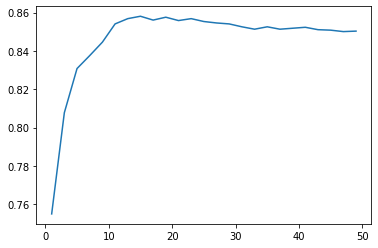

In [36]:
%%time
cv_scores=[]
best_k=[]
for k in a:
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree")
    scores=cross_val_score(knn,X_train,Y_train,cv=4,scoring="accuracy")
    cv_scores.append(scores.mean())
    best_k.append(k)
accuracy=max(cv_scores)
optimal_k=best_k[cv_scores.index(max(cv_scores))]
plt.plot(best_k,cv_scores)
plt.show
print("the k={} with max accuracy={} is ".format(optimal_k,accuracy))

the classification reports:
              precision    recall  f1-score   support

           0       0.64      0.16      0.26       184
           1       0.84      0.98      0.90       815

    accuracy                           0.83       999
   macro avg       0.74      0.57      0.58       999
weighted avg       0.80      0.83      0.78       999

the confusion matrix is : n
[[ 30 154]
 [ 17 798]]


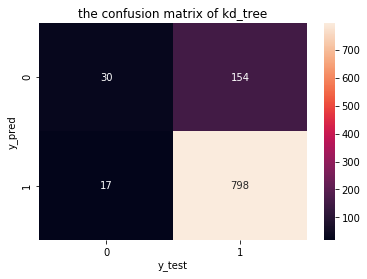

CPU times: user 2.62 s, sys: 112 ms, total: 2.73 s
Wall time: 2.5 s


In [52]:
%%time
knn=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="kd_tree")
knn.fit(X_train,Y_train)
y_pred=knn.predict(x_test)
y_pred_proba=knn.predict_proba(x_test)
#print("the accuracy of coorecy value is ",y_pred_proba)
classification_reports=classification_report(y_test,y_pred)
print("the classification reports:",classification_reports,sep='\n')
confusion_mat=confusion_matrix(y_test,y_pred,labels=[0,1])
print("the confusion matrix is : n",confusion_mat,sep='\n')
sns.heatmap(confusion_mat,annot=True,fmt='g')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("the confusion matrix of kd_tree")
plt.show()

In [63]:
def kd_tree(upper_limit_k,X_train,Y_train,x_test,y_test):
    a=list(np.arange(1,upper_limit_k,2))
    cv_scores=[]
    best_k=[]
    for k in a:
        n=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree")
        scores=cross_val_score(n,X_train,Y_train,cv=4,scoring="accuracy")
        cv_scores.append(scores.mean())
        best_k.append(k)
    accuracy=max(cv_scores)
    optimal_k=best_k[cv_scores.index(max(cv_scores))]
    plot=plt.plot(best_k,cv_scores)
    plt.show
    print("the k={} with max accuracy={} is ".format(optimal_k,accuracy))

    
    knn=KNeighborsClassifier(n_neighbors=optimal_k,algorithm="kd_tree")
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(x_test)
    y_pred_proba=knn.predict_proba(x_test)
    #print("the accuracy of coorecy value is ",y_pred_proba)
    classification_reports=classification_report(y_test,y_pred)
    print("the classification reports:",classification_reports,sep='\n')
    confusion_mat=confusion_matrix(y_test,y_pred,labels=[0,1])
    print("the confusion matrix is : n",confusion_mat,sep='\n')
    sns.heatmap(confusion_mat,annot=True,fmt='g')
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.title("the confusion matrix of kd_tree")
    plt.show()

In [64]:
avg_w2v=joblib.load("avg_w2v")

In [65]:
avg_w2v

[array([ 2.26204223e-01,  3.44463447e-02, -7.59556085e-02,  3.48329725e-01,
         7.83806742e-02,  2.95520523e-01, -3.30491750e-01,  2.53931390e-01,
        -2.85100382e-02,  3.98722006e-01, -1.67943826e-01,  8.45423252e-02,
        -2.62870622e-01,  7.01717594e-05,  6.24124405e-02, -8.68054259e-02,
         2.70804428e-01, -9.09009771e-02, -2.86274478e-02, -1.24572428e-01,
         1.49328597e-01, -5.09572115e-01,  2.49145079e-01, -3.63842807e-02,
         4.43142932e-03,  4.87503773e-01, -4.62940621e-01, -3.13710453e-01,
         2.11136283e-01,  4.82332327e-02, -3.63195227e-01, -8.41956764e-03,
        -6.28208179e-02,  6.16996237e-03,  2.76155437e-02, -1.47793336e-01,
         5.08003260e-01, -1.42328036e-01,  9.96146727e-02, -2.05966873e-01,
        -4.94031612e-02, -1.30656884e-01, -1.57631617e-01,  1.86581820e-02,
         1.12054122e-01, -2.66843026e-01,  8.02653921e-02, -1.89108107e-01,
         1.50378398e-01, -3.83641485e-02,  1.22268197e-01, -1.19952131e-01,
        -1.8

In [66]:
y_10000=joblib.load("y_amazon_10000")

In [67]:
y_10000

1146    1
1145    1
7427    1
3481    1
6790    1
       ..
7451    0
8731    0
7620    1
7156    0
5259    1
Name: Score, Length: 9990, dtype: int64

In [68]:
X_train,x_test,Y_train,y_test=train_test_split(avg_w2v,y_10000,test_size=0.20,shuffle=False)

the k=31 with max accuracy=0.8375880056217909 is 
the classification reports:
              precision    recall  f1-score   support

           0       0.59      0.04      0.07       360
           1       0.82      0.99      0.90      1638

    accuracy                           0.82      1998
   macro avg       0.71      0.52      0.48      1998
weighted avg       0.78      0.82      0.75      1998

the confusion matrix is : n
[[  13  347]
 [   9 1629]]


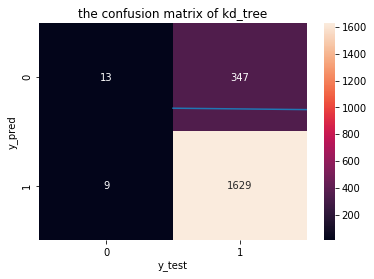

CPU times: user 8min 33s, sys: 368 ms, total: 8min 33s
Wall time: 8min 33s


In [69]:
%%time
kd_tree(80,X_train,Y_train,x_test,y_test)

In [70]:
w2v=joblib.load("words_2_vec")

In [72]:
X_train,x_test,Y_train,y_test=train_test_split(w2v,y,test_size=0.20,shuffle=False)

the k=29 with max accuracy=0.8433043980854602 is 


/home/sushil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


the classification reports:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.82      1.00      0.90       815

    accuracy                           0.82       999
   macro avg       0.41      0.50      0.45       999
weighted avg       0.67      0.82      0.73       999

the confusion matrix is : n
[[  0 184]
 [  0 815]]


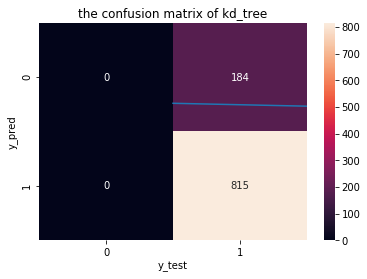

CPU times: user 33.9 s, sys: 128 ms, total: 34.1 s
Wall time: 33.8 s


In [74]:
%%time
kd_tree(51,X_train,Y_train,x_test,y_test)

In [75]:
w_tf=joblib.load("tfidf_sent_vectors")

In [76]:
w_tf

[array([ 0.22609406, -0.0020623 , -0.07943303,  0.36162757,  0.03609391,
         0.23658825, -0.30565577,  0.19060688, -0.03209196,  0.32000416,
        -0.11744952,  0.04604245, -0.21907275, -0.01298101,  0.10126962,
        -0.13193145,  0.21608671, -0.0765225 ,  0.00253142, -0.13956286,
         0.09580759, -0.38581455,  0.23026487, -0.01725558,  0.03689391,
         0.45832245, -0.33687494, -0.27153995,  0.16519213,  0.03042301,
        -0.35437564, -0.04708367, -0.09192118, -0.00482596, -0.02209466,
        -0.13070021,  0.51272452, -0.12219946,  0.12399689, -0.19556432,
        -0.10559004, -0.12473483, -0.16210408,  0.04751607,  0.1330436 ,
        -0.18122932,  0.08779216, -0.1459849 ,  0.11081989, -0.00173439,
         0.0877218 , -0.02516475, -0.2408993 , -0.09919938,  0.17595027,
        -0.03054379,  0.27558165, -0.08157975,  0.14763061, -0.32549154,
         0.24029337,  0.06077197,  0.13685472, -0.00190076, -0.18219551,
         0.02843811,  0.05367613,  0.25135112,  0.1

In [77]:
X_train,x_test,Y_train,y_test=train_test_split(w_tf,y_10000,test_size=0.20,shuffle=False)

the k=31 with max accuracy=0.8372121290567244 is 
the classification reports:
              precision    recall  f1-score   support

           0       0.57      0.03      0.06       360
           1       0.82      0.99      0.90      1638

    accuracy                           0.82      1998
   macro avg       0.70      0.51      0.48      1998
weighted avg       0.78      0.82      0.75      1998

the confusion matrix is : n
[[  12  348]
 [   9 1629]]


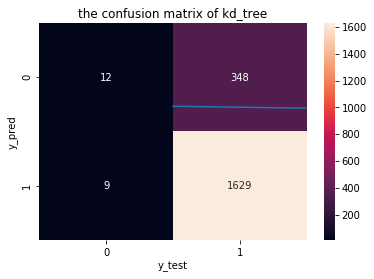

CPU times: user 4min 10s, sys: 180 ms, total: 4min 10s
Wall time: 4min 10s


In [78]:
%%time
kd_tree(51,X_train,Y_train,x_test,y_test)

Conclusion: